# Домашние задание

1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатк

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


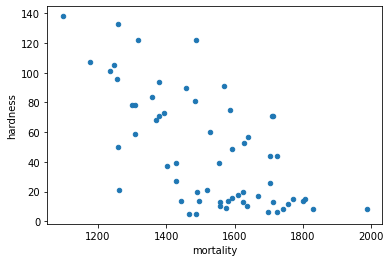

In [74]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [75]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [76]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Вывод: связь обратная, т.е. при увелечении одной из величин значение другой уменьшается, следовательно, чем больше смертность, тем плотность воды ниже

Модель линейной регрессии

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [78]:
X = df[['mortality']]
y = df['hardness']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [80]:
X_train.shape # для тренировки будет исп-ся 42 стр

(42, 1)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные ко

LinearRegression()

In [82]:
model.coef_

array([-0.12670202])

In [83]:
model.intercept_

239.3678426140957

In [84]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

Коэффицент детерминации

In [85]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4948982822876836

Коэффециент показывает эффективность нашей модели от "примитивной" (примитивная модель - среднее арифметическое)

Построем линейный график регрессии

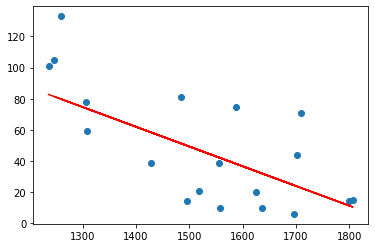

In [86]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Чтобы посмотреть на график остатков используем statsmodel

In [87]:
# импортируем библиотеки
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [89]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [90]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           7.83e-06
Time:                        18:32:40   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

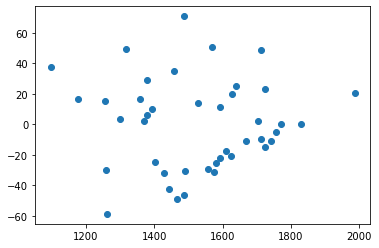

In [91]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

Вывод: модель построена правильно, т к остатки ведут себя хаотично, а также нет никаких резких выбросов

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [92]:
# разделим наш дф на 2 группы с помощью метода loc
south = df.loc[df.location == 'South']
north = df.loc[df.location == 'North']

Строим точечный график для нужных нам столбцов

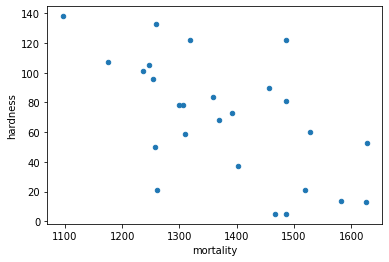

In [93]:
south.plot(kind='scatter', x='mortality', y='hardness')

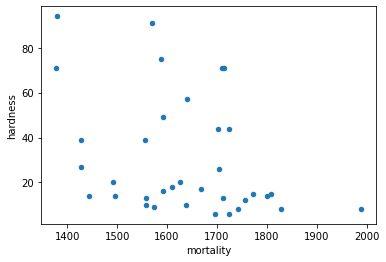

In [94]:
north.plot(kind='scatter', x='mortality', y='hardness')

Рассчитаем коэффициент спирмена и кендала для каждой из групп

In [95]:
south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [96]:
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [97]:
south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [98]:
north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


Вывод: связь по прежнему обратная в обоих случаях, следовательно, чем смертность больше, тем меньше плотность воды, вне зависимости от расположения городов правило сохраняется

приступим к построению модели линейной регрессии 

In [99]:
X1 = south[['mortality']]
y1 = south['hardness']

In [100]:
X2 = north[['mortality']]
y2 = north['hardness']

In [101]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [102]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [103]:
X1_train.shape # будем исп-ть для тренировочной модели 18 стр

(18, 1)

In [104]:
X2_train.shape

(24, 1)

In [105]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train) 

LinearRegression()

In [106]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train) 

LinearRegression()

Посмотрим на эффективность наших моделей через коэффициент детерминации

In [115]:
model1.score(X1_test, y1_test)

-0.05226615794483824

In [116]:
model2.score(X2_test, y2_test)

-0.34863672627416675

Коэффициент отрицательный, а значит наши модели не эффективны, и рассматривать смертность и плотность воды в разрезе групп не корректно

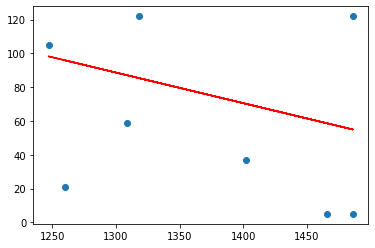

In [117]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r')

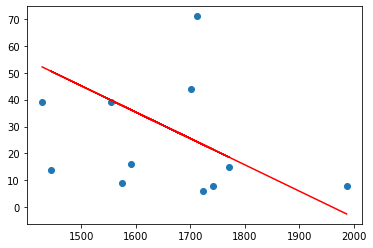

In [118]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')

Приступим к просмотру остатков

In [119]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [120]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [121]:
X1_const = sm.add_constant(X1_train)

In [122]:
X2_const = sm.add_constant(X2_train)

In [123]:
model1 = sm.OLS(y1_train, X1_const)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           7.30e-05
Time:                        18:38:29   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.1191     47.493      6.825      0.0

C:\Users\79055\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [124]:
model2 = sm.OLS(y2_train, X2_const)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 12 Dec 2020   Prob (F-statistic):             0.0316
Time:                        18:38:47   Log-Likelihood:                -111.11
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7280     69.297      2.767      0.0

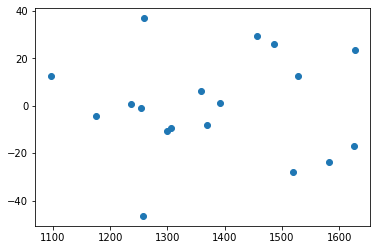

In [126]:
plt.scatter(X1_const.iloc[:, 1], results1.resid)

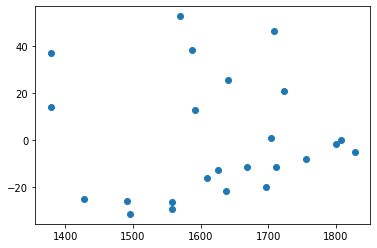

In [127]:
plt.scatter(X2_const.iloc[:, 1], results2.resid)

Остатки сильно разбросаны, можем предположить, что для анализа в разрезе групп мало данных